In [7]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as PillowImage

#Part-A Dilate or Erode binary image


In [19]:
def dilate_erode_binary(img, kernel, center_x , center_y, operation="dilate", iteration=1):
  #Get image dimensions
  m, n = img.shape

  # Apply the specified morphological operation
  for k in range(iteration):

    #For storing morphed image
    res = np.zeros((m, n), dtype=np.uint8)
    for i in range(center_x, m - center_x):
      for j in range(center_y, n - center_y):

        #define region of interest in image
        roi = img[i - center_x:i + center_x + 1, j - center_y:j + center_y + 1]

        mul_res = roi*kernel
        if operation == "dilate":
          res[i, j] = np.max(mul_res)
        if operation == "erode":
          mul_res = mul_res + (np.ones_like(kernel)-kernel) # We are concern with index which have 1 in the structuring element.
          res[i, j] = np.min(mul_res)
    img = res
  return img

In [23]:
def print_results(structuring_element, input_image, morphed_image, titles):

  edge_img = np.ones_like(input_image) - input_image.copy() + morphed_image
  # Create a row with 3 columns
  fig, axes = plt.subplots(1, 3, figsize=(20, 20))
  images = [structuring_element, edge_img, morphed_image]

  for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap="gray")
    ax.set_title(titles[i])  # Set the title for each image
    ax.axis('off')

  plt.show()


In [12]:
def PartA_results(image_path, SE, Structuring_type = "SE1", morphology_type="dilate", iteration = 1):
  # Read the image
  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

  #Center of structuring element
  kernel_cx, kernel_cy = 0 ,0
  if SE.shape[0] == 1 :
    kernel_cx , kernel_cy = 0 , 0
  else:
    kernel_cx = kernel_cy = SE.shape[0]//2

  morphed_image  = dilate_erode_binary(img, SE, kernel_cx, kernel_cy, morphology_type, iteration)

  # Show structuring element, input, and morphed images together
  titles = ["Structuring Element :" + Structuring_type, "Input image" ,morphology_type]
  print_results(SE, img, morphed_image, titles)


In [14]:
# Define the kernel (Structuring Element)
SE1 = np.array([[1,1]],dtype=np.uint8)
SE2 = np.ones((3,3),dtype = np.uint8)
SE3 = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]],dtype=np.uint8)
SE4 = np.ones((9, 9), dtype=np.uint8)
SE5 = np.ones((15, 15), dtype=np.uint8)

SE  = [SE1 , SE2 , SE3, SE4, SE5]

In [15]:
image_path = "ricegrains_mono.bmp"

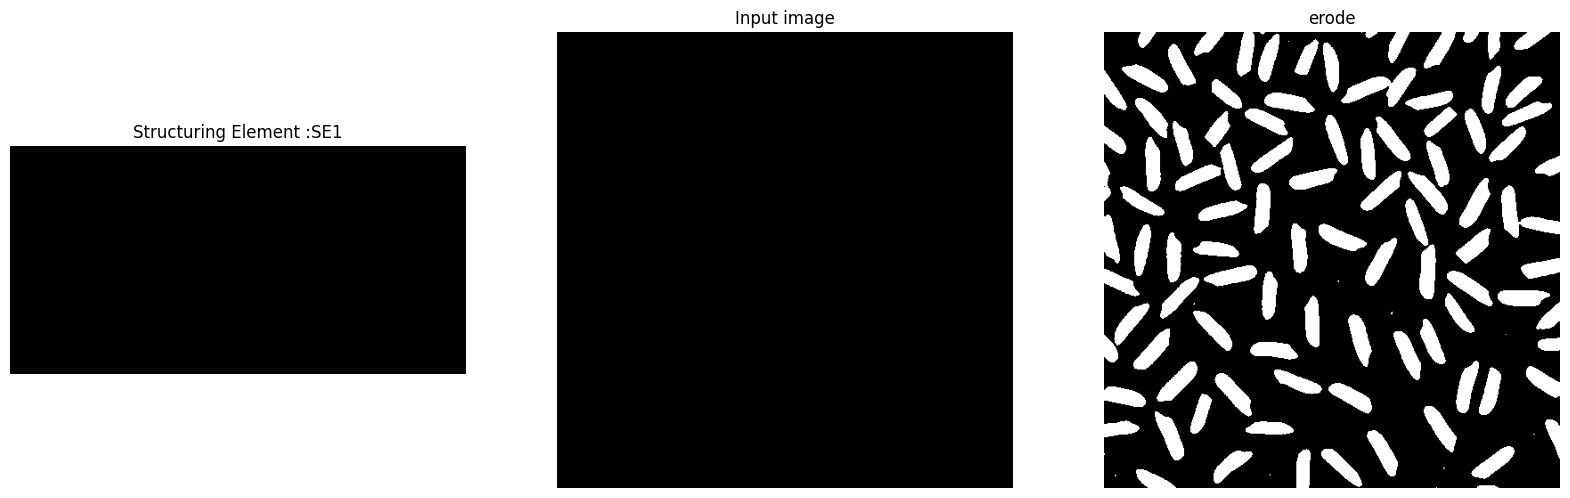

<Figure size 640x480 with 0 Axes>

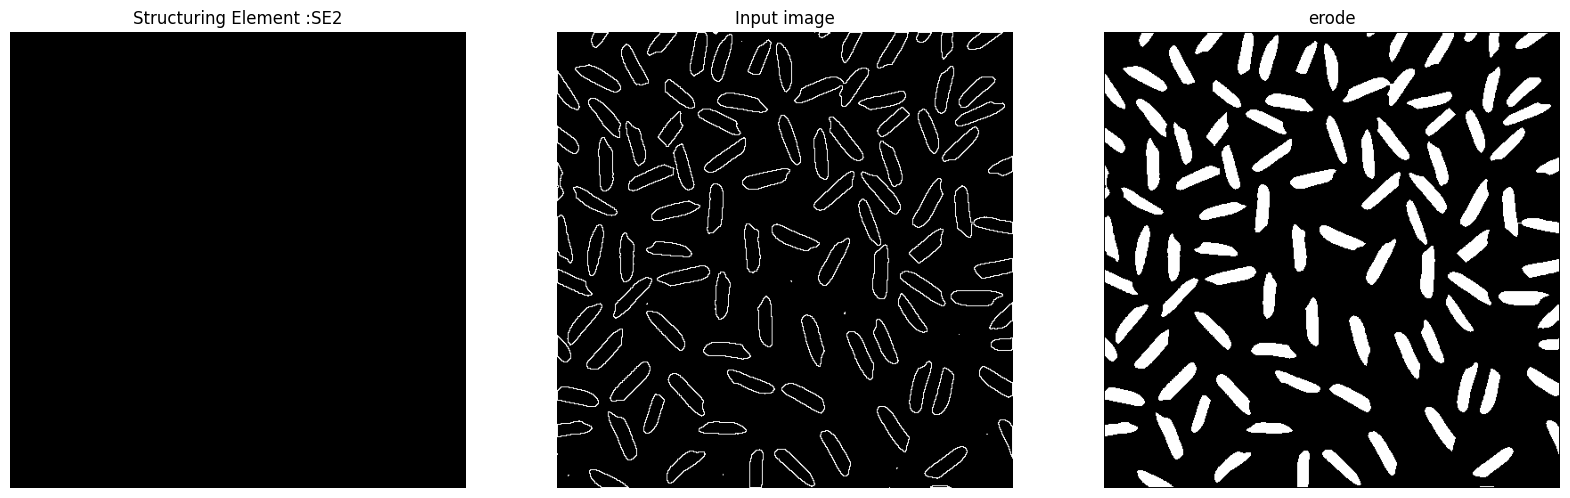

<Figure size 640x480 with 0 Axes>

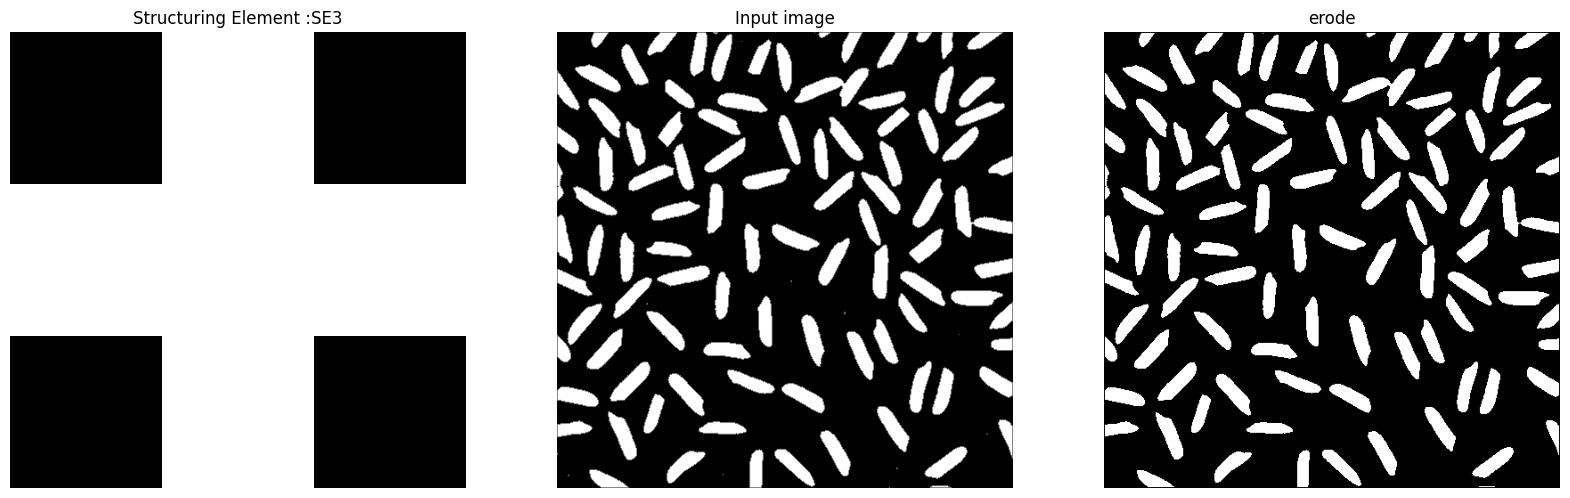

<Figure size 640x480 with 0 Axes>

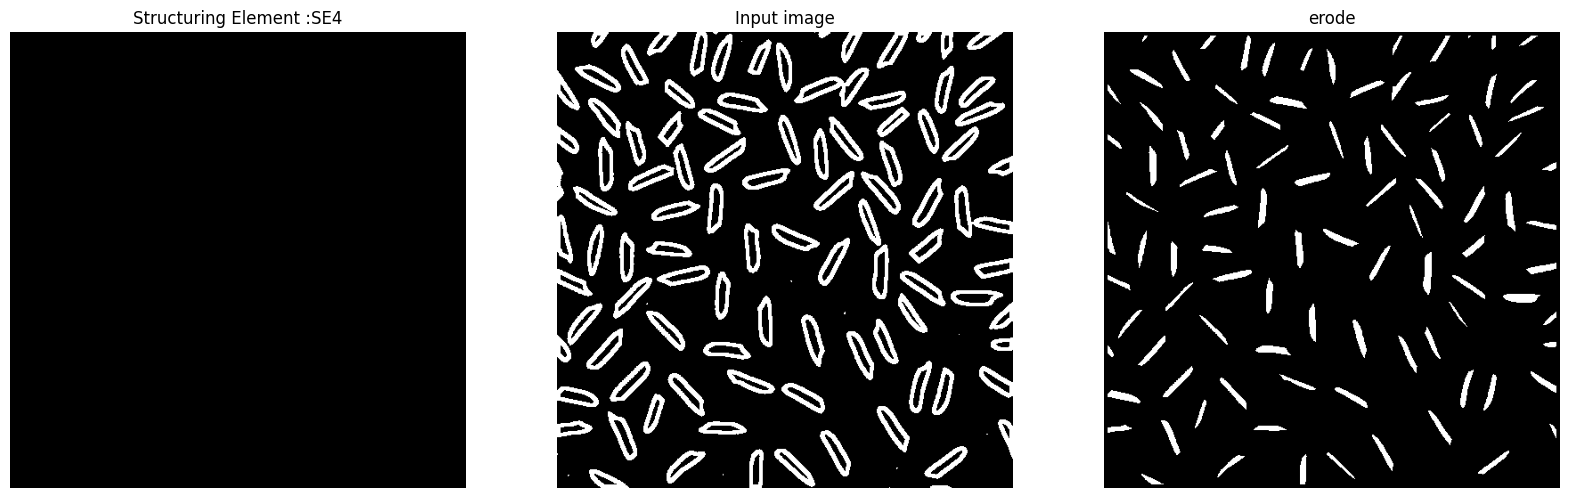

<Figure size 640x480 with 0 Axes>

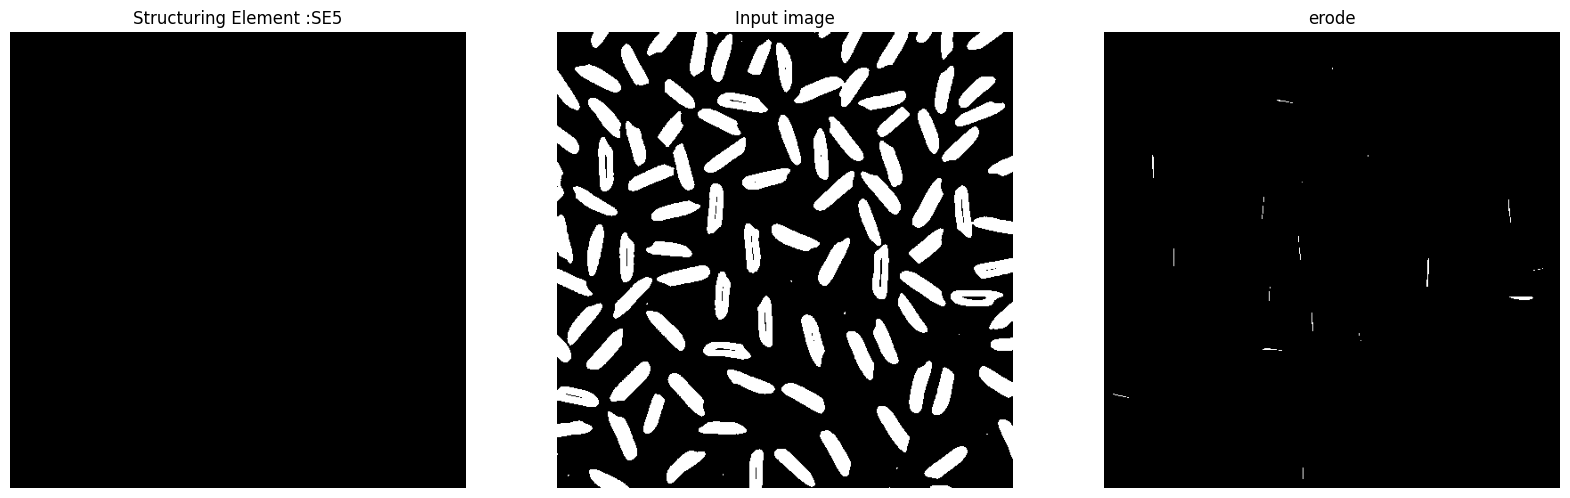

<Figure size 640x480 with 0 Axes>

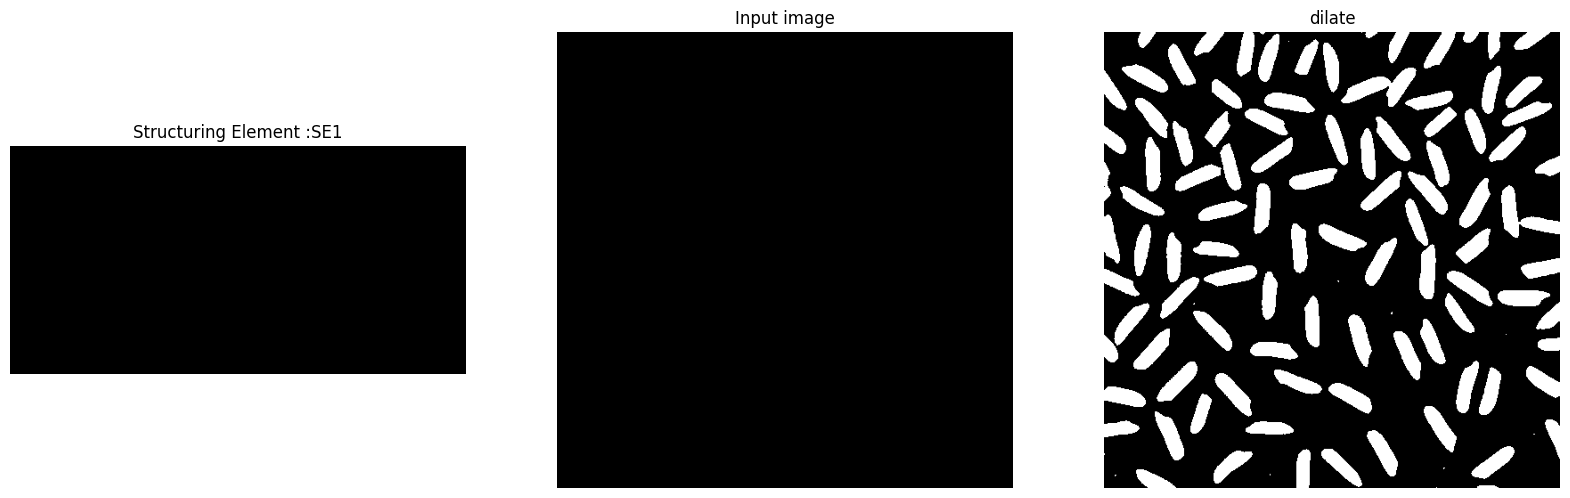

<Figure size 640x480 with 0 Axes>

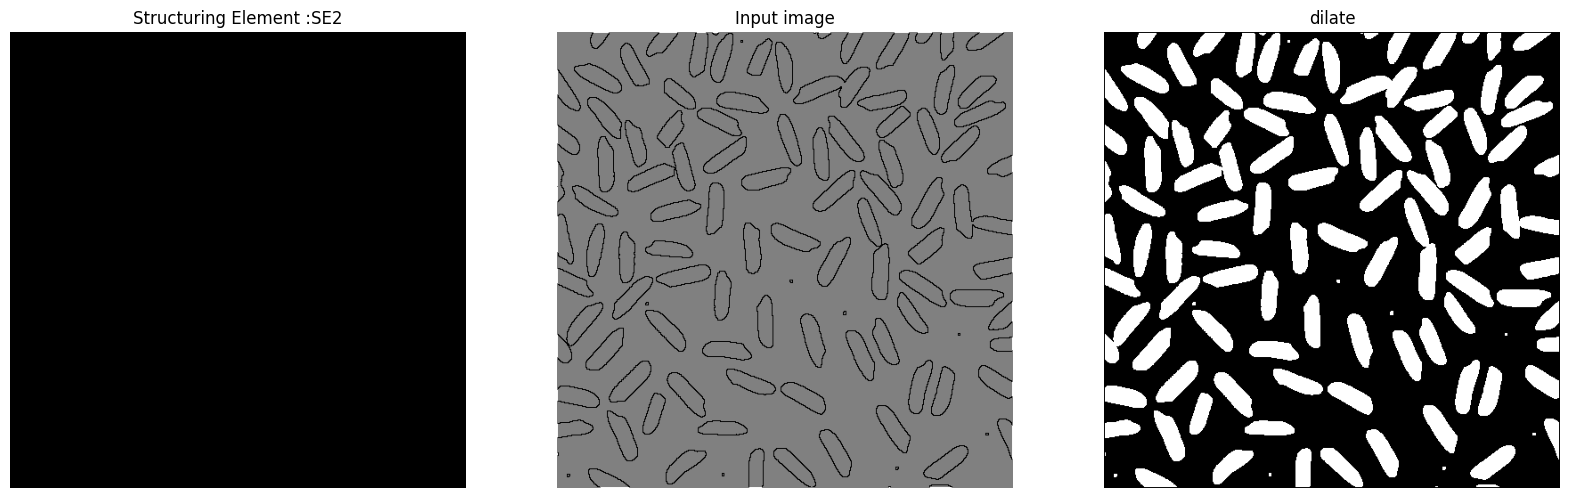

<Figure size 640x480 with 0 Axes>

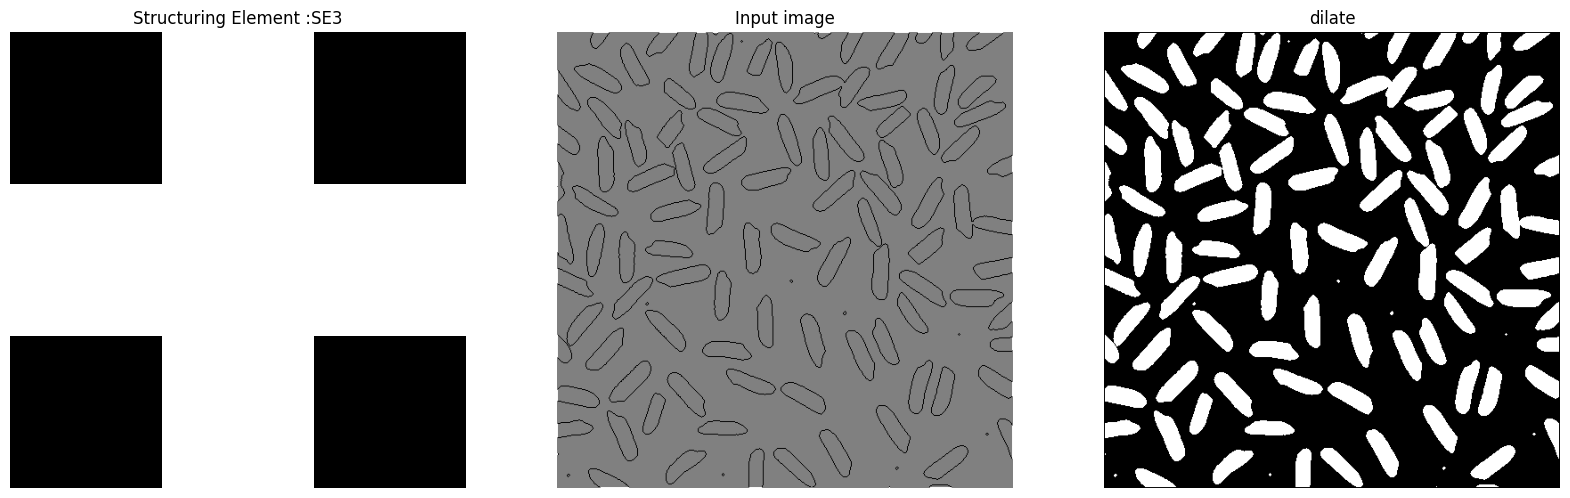

<Figure size 640x480 with 0 Axes>

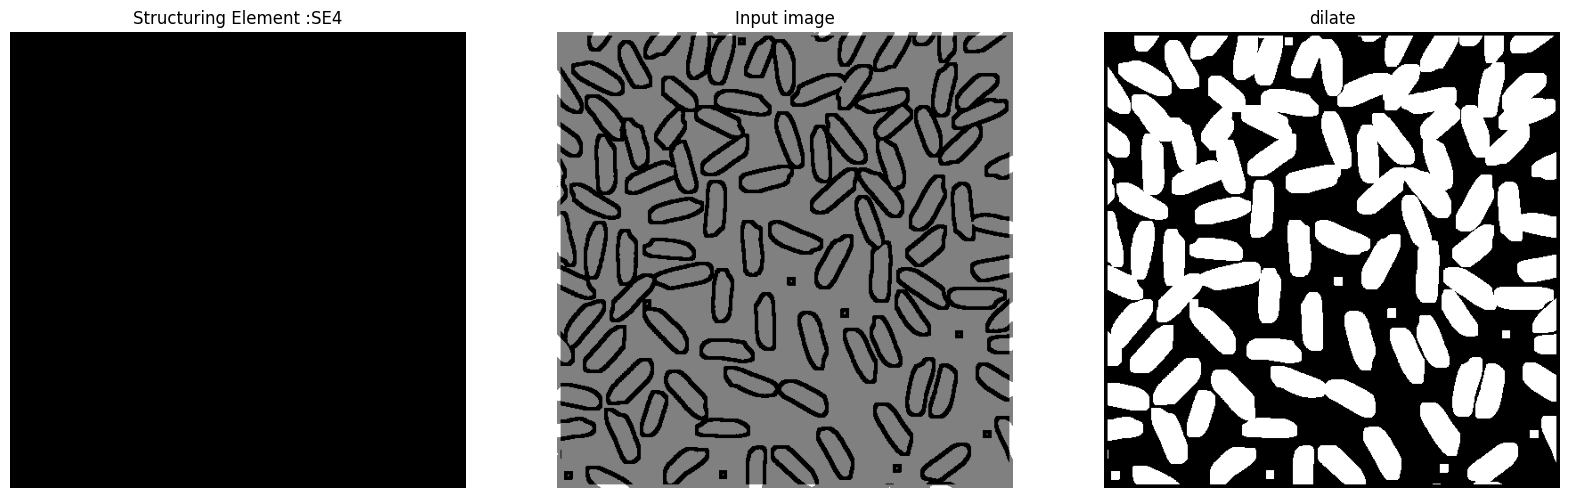

<Figure size 640x480 with 0 Axes>

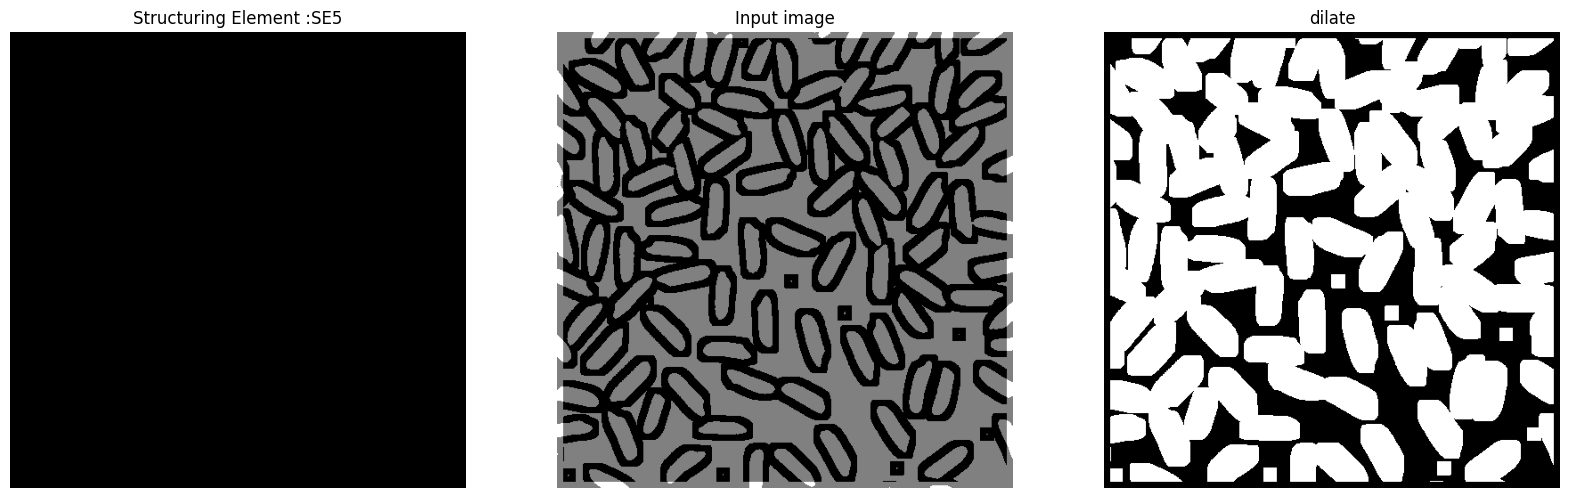

<Figure size 640x480 with 0 Axes>

In [24]:
for i in range(5):
  PartA_results(image_path,SE[i],Structuring_type = "SE"+str(i+1),morphology_type= "erode")
for i in range(5):
  PartA_results(image_path,SE[i],Structuring_type = "SE"+str(i+1),morphology_type= "dilate")

#Part-B Opening and closing binary image

In [29]:
def opening_closing_binary(image_path, SE, Structuring_element = "SE1",operation_type="opening"):
  # Read the image
  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

  #Kernel center
  kernel_x, kernel_y = 0 ,0
  if SE.shape[0] == 1 :
    kernel_x , kernel_y = 0 , 0
  else:
    kernel_x = kernel_y = SE.shape[0]//2

  # Default order_of_opening_closing is "OPENING OPERATION"
  opening_or_closing = ["erode","dilate"]

  if operation_type == "closing":
    opening_or_closing = opening_or_closing[::-1]
  result = img

  for morphology_type in  opening_or_closing:
    result  = dilate_erode_binary(result, SE, kernel_x, kernel_y, morphology_type)

  # Show structuring element, input, and morphed images together
  titles = ["Structuring Element :" + Structuring_element, "Input image" ,operation_type]
  print_results(SE, img, result, titles)


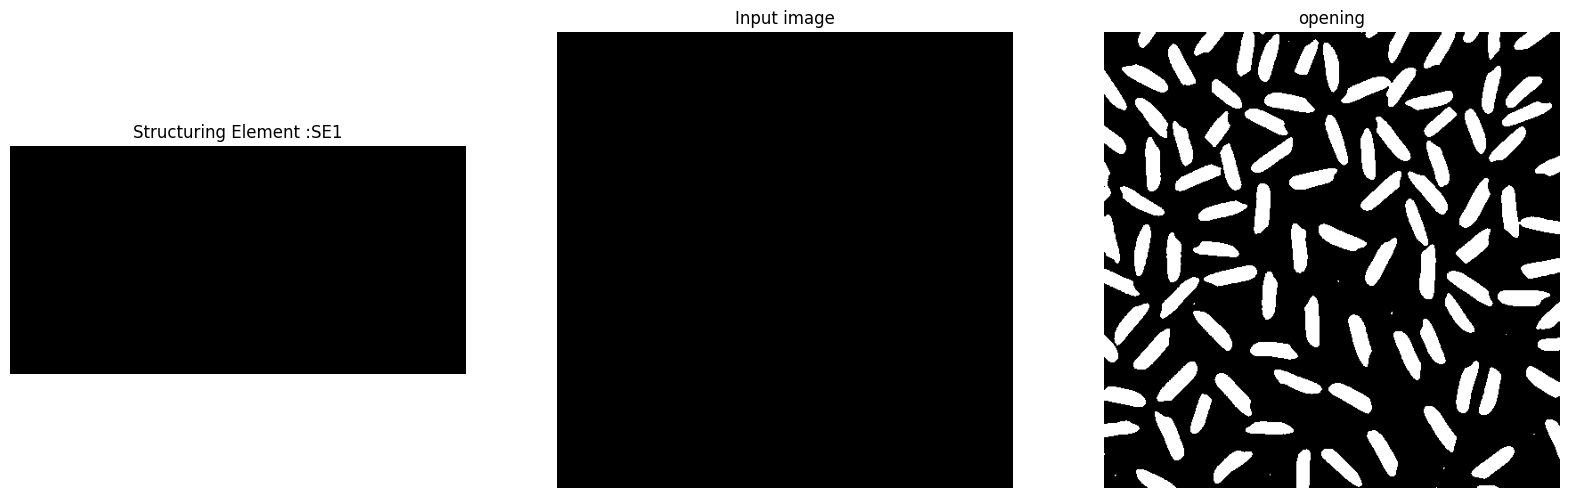

<Figure size 640x480 with 0 Axes>

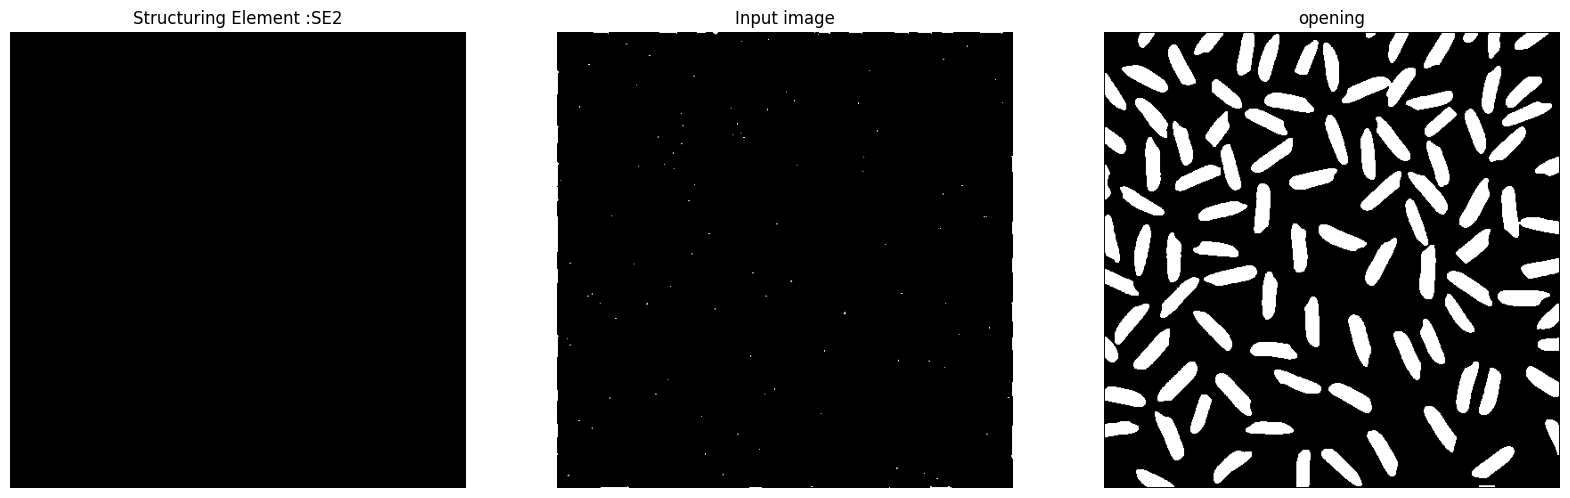

<Figure size 640x480 with 0 Axes>

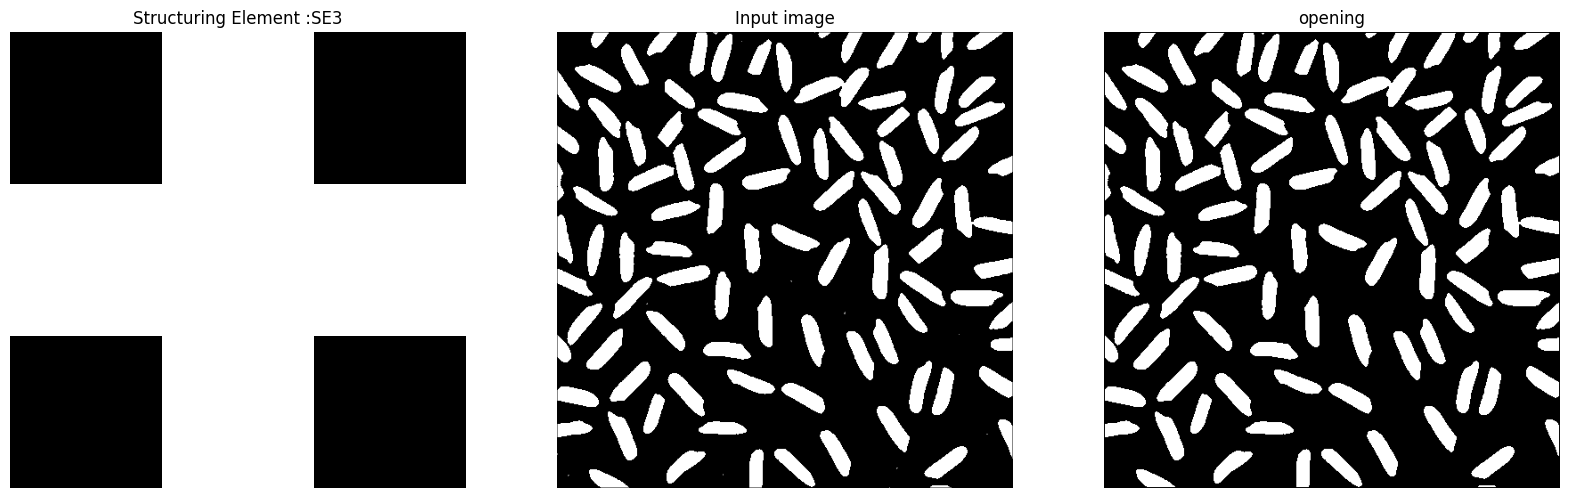

<Figure size 640x480 with 0 Axes>

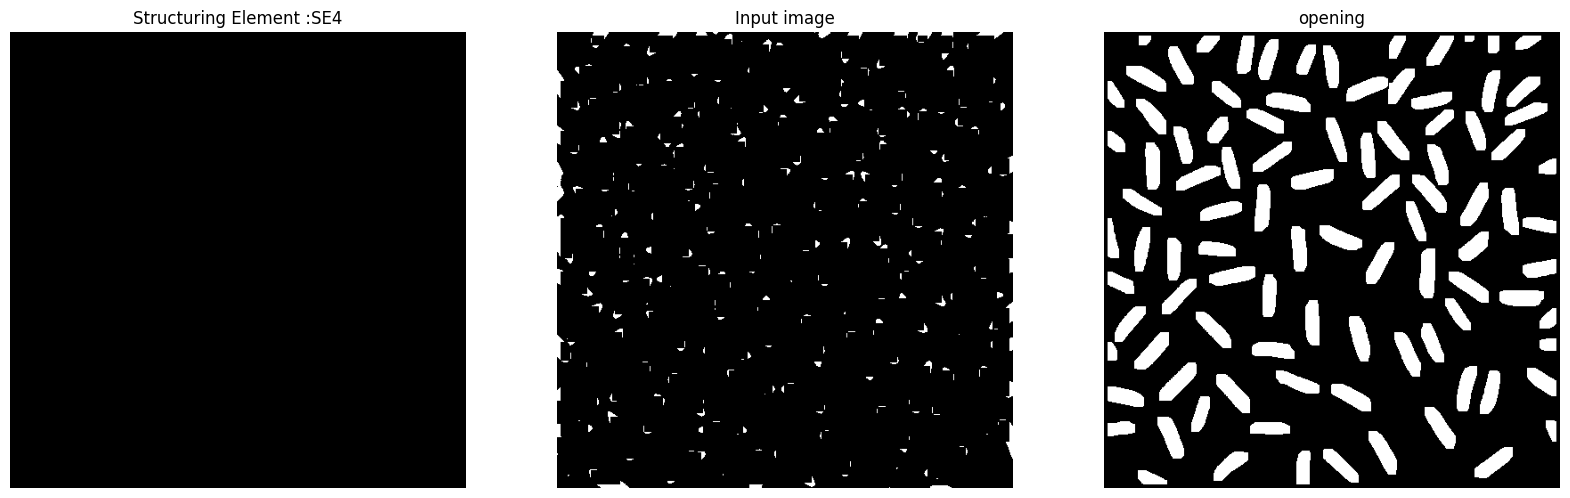

<Figure size 640x480 with 0 Axes>

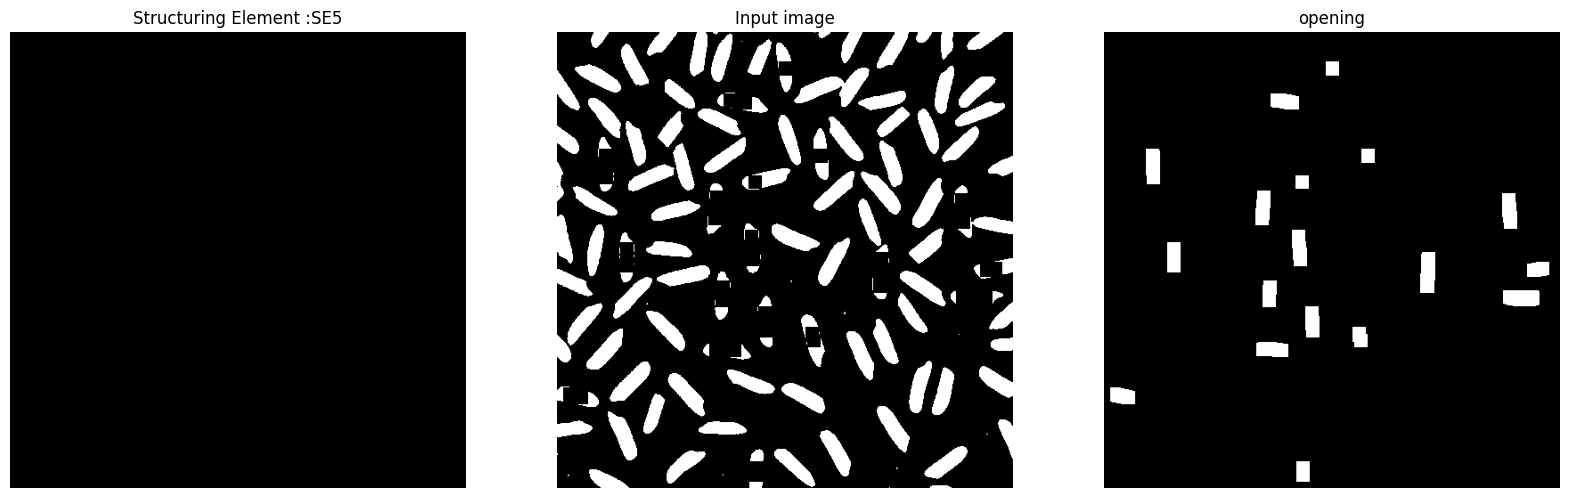

<Figure size 640x480 with 0 Axes>

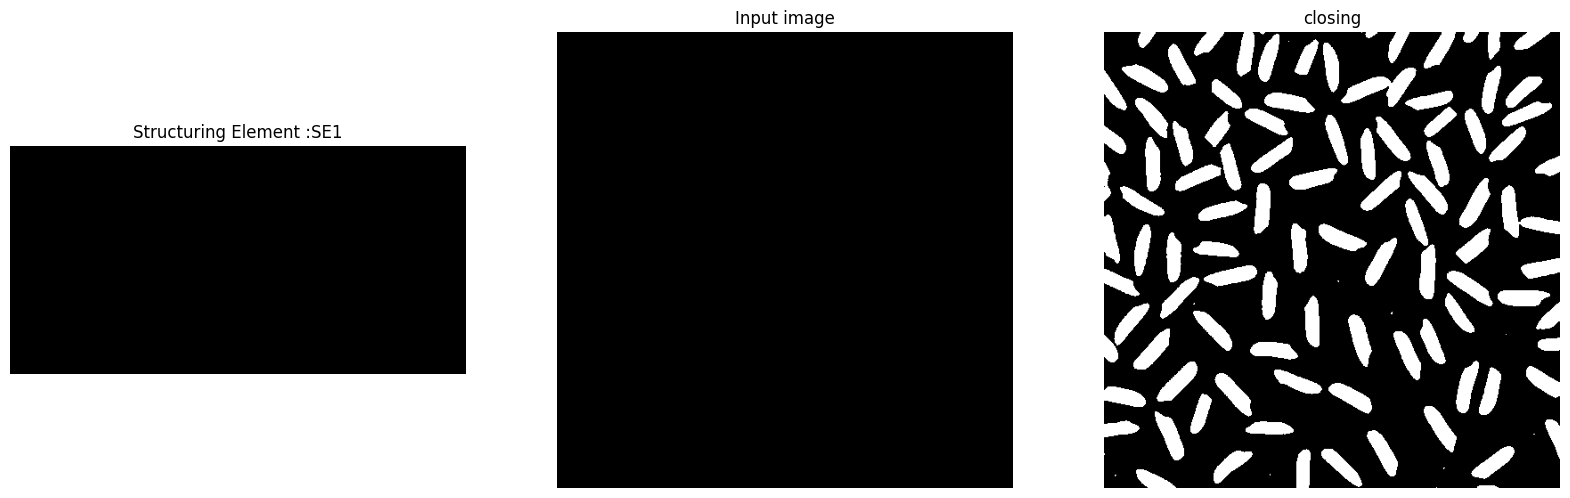

<Figure size 640x480 with 0 Axes>

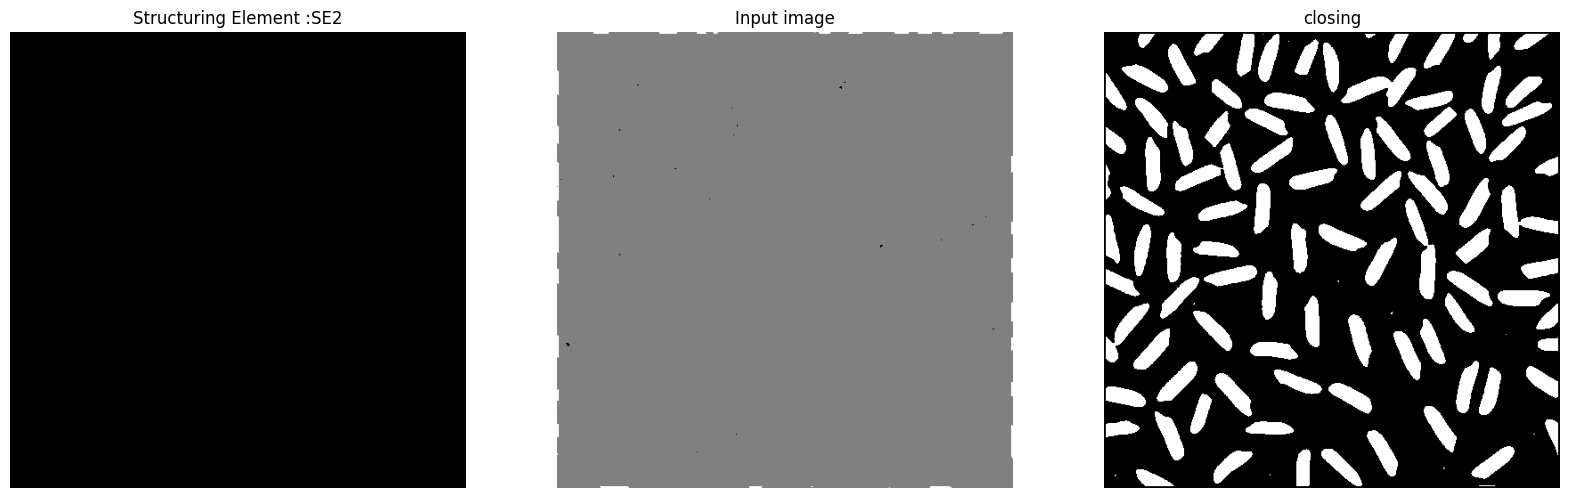

<Figure size 640x480 with 0 Axes>

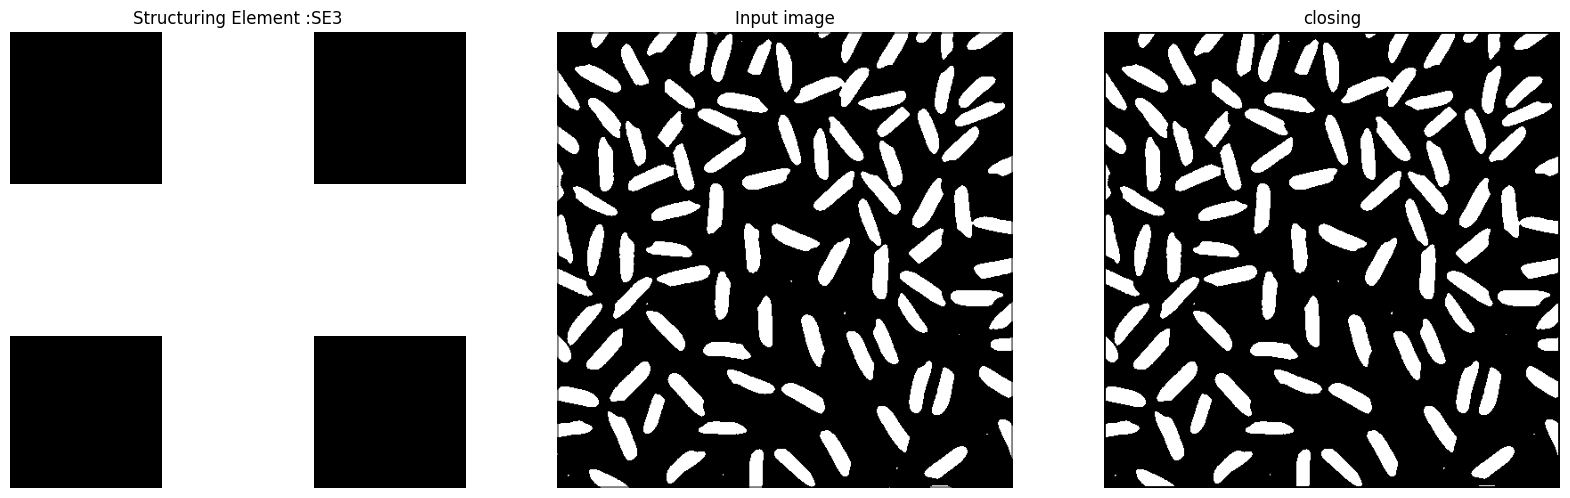

<Figure size 640x480 with 0 Axes>

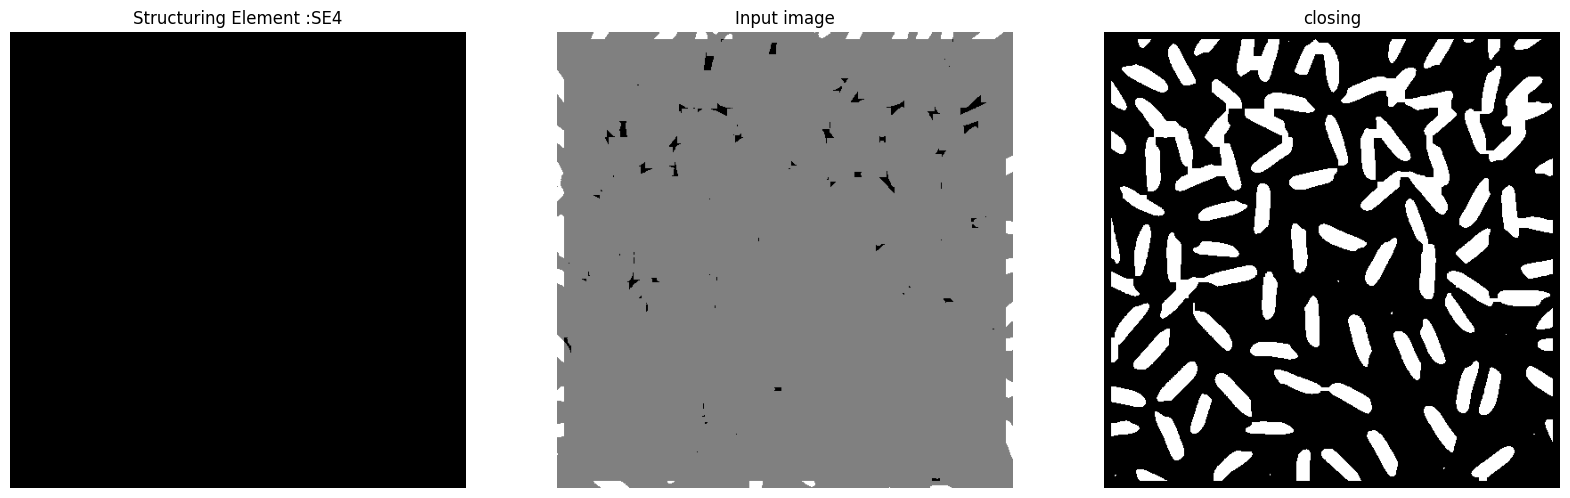

<Figure size 640x480 with 0 Axes>

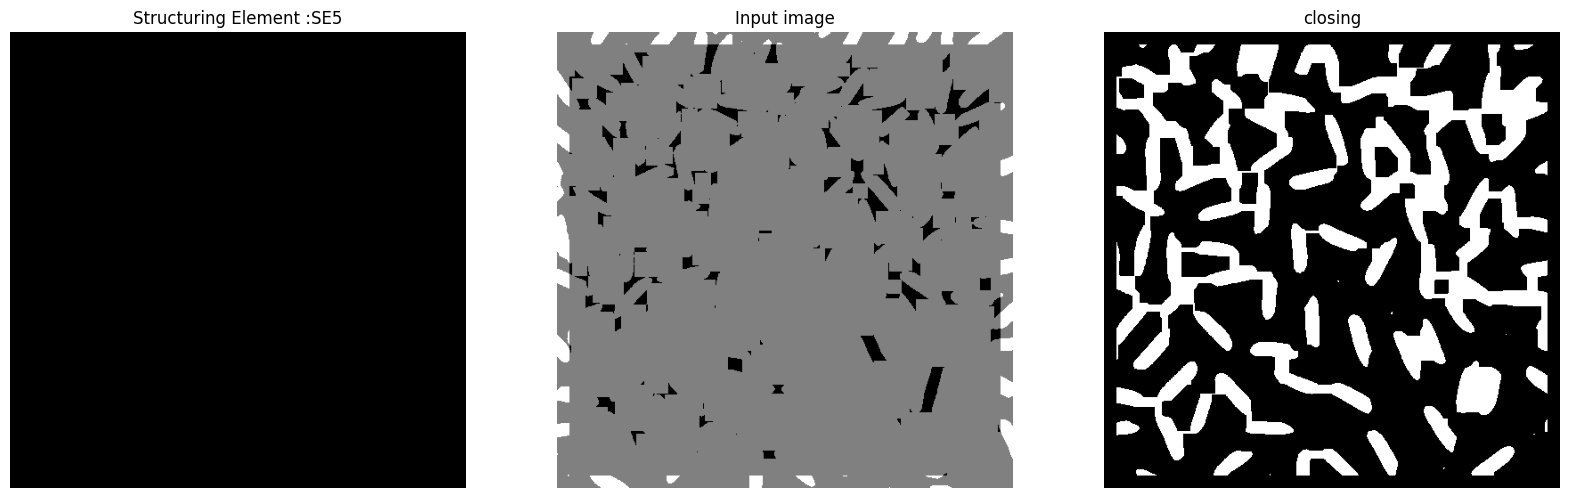

<Figure size 640x480 with 0 Axes>

In [30]:
for i in range(5):
  opening_closing_binary(image_path, SE[i], Structuring_element = "SE"+str(i+1), operation_type= "opening")
for i in range(5):
  opening_closing_binary(image_path, SE[i], Structuring_element = "SE"+str(i+1), operation_type= "closing")